## Machine Learning

### Supervised learning algorithms:

Presense of training data with predictors (features) and correct answer (labels).
Model uses training data to learn the relationship between features and labels.

#### Regression: 

Predict a Continuous number 

    Simple Linear Regression
    Multiple Linear Regression
    Polynomial Regression
    SVR
    Decision Tree Regression
    Random Forest
    
    
#### Classification: 

Predict a category. 

    Logistic Regression
    K-Nearest Neighbors (KNN)
    Support Vector Machine (SVM)
    Naive Bayes
    Decision Tree Classification
    Random Forest Classification


### Un-supervised learning algorithms:

Absense of output data. 
Machine tries to group unsorted information based on patterns without any prior training of data.

#### Clustering: 

    Grouping a set of objects in such a way that objects in the same group are more similar to each other than to those in other groups.

#### Anomaly detection:

    Identification of items, events or observations which do not conform to an expected pattern or other items in a dataset.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")


### Data Preprocessing

Handling Missing Data

    pandas dropna, fillna

Data Cleaning, formatting

Encoding categorical data

    pandas get_dummies
    sklearn LabelEncoder, OneHotEncoder

Splitting the data into Train and Test
    
    sklearn train_test_split

Feature Scaling:
    
    Standardization: (x - mean(x)) / std(x) sklearn StandardScaler
    Normalization: (x - min(x)) / (max(x) - min(x)) sklearn MinMaxScaler

## Classification

### Logistic Regression

Logistic Regression measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a logistic function. These probabilities can be converted into class predictions

The regression coefficient is the estimated increase in the log odds of the outcome per unit increase in the value of the condition.

> $$F(z) = \frac{1}{1 + e^{-z}}$$

It returns a probability score between 0 and 1. 
Map this to a discrete class by selecting a threshold value.

eg: Student passed or failed in a test

    p >= 0.6, class=1
    p < 0.6, class=0


#### Sigmoid Function

Fitting logistic regression curve to the data

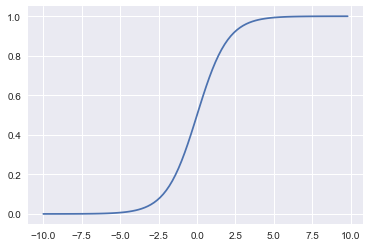

In [42]:
x = np.arange(-10., 10., 0.2)
y = 1. / (1. + np.exp(-x))
plt.plot(x,y)
plt.show()

In [65]:
#iris = pd.read_csv('iris.csv')
iris=pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')

iris['species'] = iris['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [67]:

X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values

#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


#Fitting logistic regression to training set

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [45]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.96666666666666667

### Applying classification algorithms on mushrooms dataset

In [68]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [71]:
df.isnull().any()
df['cap-color'].value_counts()

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64

In [48]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

#### Encode categorical features/label

In [72]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for col in df.columns:
    df[col] = le.fit_transform(df[col])
    
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


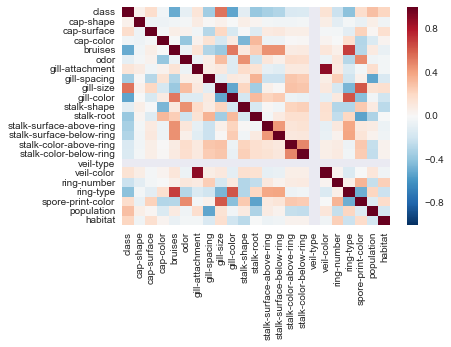

In [73]:
sns.heatmap(df.corr())

In [74]:
X = df.iloc[:, 1:23].values
y = df.iloc[:, 0].values

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Fitting logistic regression to training set
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy, cm

(0.95261538461538464, array([[820,  32],
        [ 45, 728]]))

### Impact of Feature Scaling

In [58]:
df = pd.read_csv('mushrooms.csv')

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for col in df.columns:
    df[col] = le.fit_transform(df[col])
    
X = df.iloc[:, 1:23].values
y = df.iloc[:, 0].values

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Fitting logistic regression to training set
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy, cm

/Users/vaishaligarg/digitalvidya/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(0.95569230769230773, array([[820,  32],
        [ 40, 733]]))

### Naive Bayes Classifier

http://scikit-learn.org/stable/modules/naive_bayes.html

Naive Bayes algorithm is a simple yet effective algorithm for most use cases. This is a probabilistic model implementing Bayes' Theorem, which is shown as something like this: 

> $$P(A | B) = \frac {P(A)P(B | A)} {P(B)}$$


This is an excellent formula for classification problems. Practically the implementation is something like this:
> $$ P(Class_k | x_1......x_n) = P(Class_k) \prod_{i=1}^n p(x_i | Class_k) $$
> $$ y_h = argmax[ P(Class_k) \prod_{i=1}^n p(x_i | Class_k) ] $$

Naive Bayes Example:
    
<br>
<img src="NB.png" alt="knn_graph" style="width: 600;"/>

pros: 

    Naive assumption of independence between every pair of features
    Naive Bayes learners and classifiers can be extremely fast compared to more sophisticated methods
    
con:

    Can not learn relationship between features

Gaussian NB: It assumes that the features follow a normal distribution.

MultiNomial NB: It is suitable for discrete features. Eg: word counts for text classification

Bernoulli NB: For discreet features, like MuliNomianNB. MultinomialNB works with occurrence counts,
    BernoulliNB is designed for binary/boolean features
    
Note: Multinomial distributions can not contain negative values

In [75]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy, cm

(0.91569230769230769, array([[773,  79],
        [ 58, 715]]))

In [76]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)

#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy, cm

(0.82769230769230773, array([[787,  65],
        [215, 558]]))

### Support Vector Machines

http://scikit-learn.org/stable/modules/svm.html#classification

SVM is one if the most versitile algorithms out there and can be used for a wide varity of application. This algorithm a inherently binary classifier which split a feature vectors into two parts. Suppose we have a feature vectors(compressed into a 2-D space) for Dogs and Cats and are plotted using a scatter plot. 

This seperation is done by pushing the hyperline as furthur away from the data clusters furthest vectors called "support vectors".

This hyperplane can be defined by this simple equation: 
>  $$y = w * x + b$$

Where the goal is the find the best value of 'w' which seperates the clusters the best way. 'w' can be correctly estimated by a loss function.

Visualization of the SVM: 

<img src="SVM.png" alt="knn_graph" style="width: 200;"/>

    Finds hyperplanes separating labels
    Support vectors are the data points nearest to the hyperplane
    Get the margin for each hyperplane
    Select the optimal hyperplane (one with the highest margin)


In [77]:
#Fitting SVM to training set
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train, y_train)  

y_pred = svm.predict(X_test)

#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy, cm

(1.0, array([[852,   0],
        [  0, 773]]))

### Decision Tree

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

Decision Tree is a type of supervised learning model which tries to split the data into homogeneous sets to make predictions, visually this resembles a tree, shown below.

Typical Decision Tree Representation:

<br>
<img src="DicisionTree.png" alt="knn_graph" style="width: 600;"/>


pros:

    Simple to understand and interpret.
    Works better than Logistic regression in case of non-linear relationship between dependent & independent variables
    
con:

    Tends to overfit on data with a large number of features

In [78]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)


y_pred = tree.predict(X_test)

#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy, cm

(1.0, array([[852,   0],
        [  0, 773]]))

### K-Nearest Neighbors

KNN is a algorithm which can be used both for regression and classification problems. KNN is a lazy learning algorithm which means it does not retain any information of what it has learned from the training data but rather keeps the data handy to make predictions.

The algorithm works this way:
1. Store all the feature vectors with there mapping that is the class they were assigned to, let's say 
> $$ X_i -> Y_i $$
2. Take a unknown feature vector which has to be classified say 'u'.
3. Calculate the distance of all the k neighbors where k is user defined which is nothing but a parameter which defined how many neighbors in the dataset around 'u' is to be considered. 
4. The k neighbors are calculated using *Euclidean Distance* which is something like this 
> #### $$ distance = \sqrt{\sum_{i=0}^{n}(x_j - x_i )^ 2} $$ 
5. Once the k neighbors are found find there class and based on population of the k neighbors class assign the most common class to the 'u'.


<img src="knn.png" alt="knn_graph" style="width: 300px;"/>



In [80]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
predictions = knn_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

0.99692307692307691

### Random Forest

Newer concept, first proposed in 1995.

Random forest is an ensemble model built with a collection of decision tree classifiers. Each decision tree classifier works on random subset of data with random number of features. 

Multiple decision trees from training data and output the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

Random decision forests correct the decision trees' habit of overfitting to their training set

Visualization of the Random Forest Classifier: 

<img src="RandomForest.png" alt="knn_graph" style="width: 200;"/>


In [81]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

## Additional Practice

### Titanic machine learning

In [100]:
df = pd.read_csv('Titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S


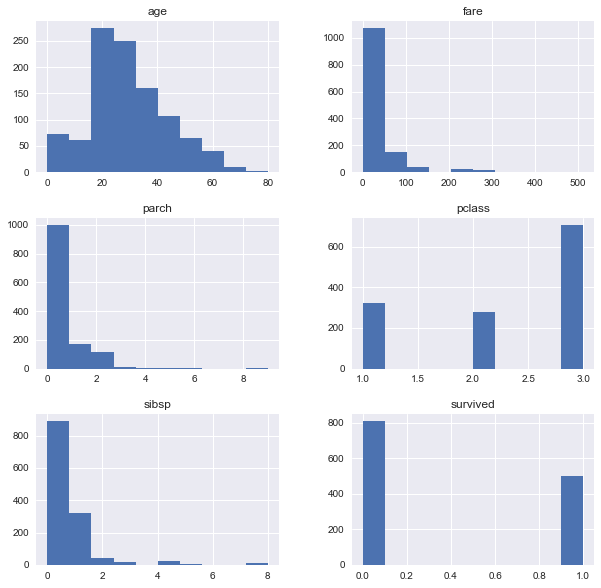

In [91]:
df.isnull().any()
df.hist(figsize = (10,10));

In [96]:
df['cabin'].isnull().sum()#

1014

### Pre-processing

Look for null values

name: Encode 

sex: Encode

age: fillna

sibsp(number of siblings/spouse) & parch(number of children/parents): combine

ticket no: drop

fare, cabin, embarked: fillna, convert to categorical


In [101]:
df['age'] = df['age'].fillna(df['age'].mean())
df['sex'] = df['sex'].map({'male': 0, 'female': 1}).astype(int)
df.drop(['ticket', 'name'], axis = 1, inplace = True)
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked
0,1,1,1,29.0000,0,0,211.3375,B5,S
1,1,1,0,0.9167,1,2,151.5500,C22 C26,S
2,1,0,1,2.0000,1,2,151.5500,C22 C26,S
3,1,0,0,30.0000,1,2,151.5500,C22 C26,S
4,1,0,1,25.0000,1,2,151.5500,C22 C26,S


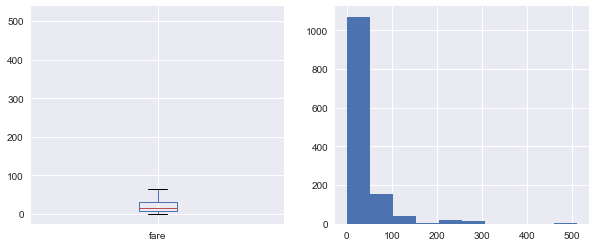

In [102]:
df['fare'].median()
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (10,4))
df.boxplot('fare', ax = ax1)
df['fare'].hist(ax = ax2)

In [103]:
df['fare'] = df['fare'].fillna(df['fare'].median())
df['cabin'].isnull().sum()
df['cabin'] = np.where(df['cabin'].notnull(), 1, 0)
df['embarked'].value_counts()
df['embarked'] = df['embarked'].fillna('S')
df['embarked'] = df['embarked'].map({'S': 0, 'C' : 1, 'Q' : 2})
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked
0,1,1,1,29.0000,0,0,211.3375,1,0
1,1,1,0,0.9167,1,2,151.5500,1,0
2,1,0,1,2.0000,1,2,151.5500,1,0
3,1,0,0,30.0000,1,2,151.5500,1,0
4,1,0,1,25.0000,1,2,151.5500,1,0


In [105]:
X = df.iloc[:, [0, 2,3,4,5,6,7,8]].values
y = df.iloc[:, 1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

#Fitting logistic regression to training set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy, cm

(0.79573170731707321, array([[178,  30],
        [ 37,  83]]))

### Facebook dataset

In [4]:
# load the facebook dataset
df = pd.read_csv('dataset_Facebook.csv', sep=';')
df.fillna(df.mean(), inplace = True)
df['Total Interactions'] = np.where( df['Total Interactions'] > 100, 1, 0)
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,0
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,1
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,0
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,1


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Type'] = le.fit_transform(df['Type'])
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,1,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,0
1,139441,2,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,1
2,139441,1,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,0
3,139441,1,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1
4,139441,1,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,1


### Feature Selection

In [8]:
from sklearn.ensemble import ExtraTreesClassifier

# create an instance
tree_clf = ExtraTreesClassifier()
y = df['Total Interactions'].tolist()
df_features = df.drop('Total Interactions', axis=1)

# store features in X array
X = df_features.values

tree_clf.fit(X, y)

importances = tree_clf.feature_importances_
feature_names = df_features.columns.tolist()

from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(tree_clf, prefit=True)
X_updated = model.transform(X)
print('Total features count', np.array(X).shape[1])
print('Selected features', np.array(X_updated).shape[1])

Total features count 18
Selected features 6


In [9]:
y = df['Total Interactions'].tolist()
X = df_features.values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# call Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()

# fit the LR model with x and y 
logreg_model.fit(X_train, y_train)

# get the predictions off the X test set
predictions = logreg_model.predict(X_test)

# check the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
accuracy

0.96799999999999997

### K nearest neighbors

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
predictions = knn_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

0.83999999999999997

In [11]:
n_neighbors = np.arange(3, 20, 1)
n_neighbors

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [12]:
# iterate for multiple k values and check which suits the need best
accuracies = []
for n in n_neighbors:
    knn_clf = KNeighborsClassifier(n_neighbors=n)
    knn_clf.fit(X_train, y_train)
    predictions = knn_clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)
accuracies

[0.83199999999999996,
 0.83999999999999997,
 0.83999999999999997,
 0.83999999999999997,
 0.83999999999999997,
 0.82399999999999995,
 0.80800000000000005,
 0.80000000000000004,
 0.80000000000000004,
 0.79200000000000004,
 0.80800000000000005,
 0.80800000000000005,
 0.82399999999999995,
 0.82399999999999995,
 0.80800000000000005,
 0.80000000000000004,
 0.80800000000000005]

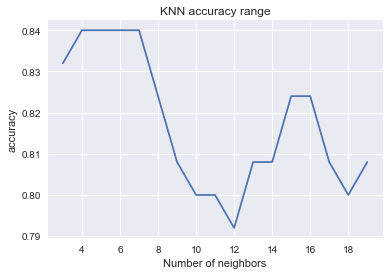

In [13]:
# plot the accuracy with each k value taken, please note this might vary for each dataset,
# finding k values like this can be computationaly heavy for a large dataset
plt.title('KNN accuracy range')
plt.xlabel('Number of neighbors')
plt.ylabel('accuracy')
plt.plot(n_neighbors, accuracies)
plt.show()